# Phase-field crystal tutorail: Polycrystalline materials

In this tutorial, we will look at different ways of creating polycrystalline materials with the PFC framework.

The first way to create a polycrystalline material is to quench the PFC. 

In [2]:
import sys
from pathlib import Path
current_dir = Path().resolve()
parent_dir = current_dir.parent
sys.path.append(str(parent_dir))
import comfit as cf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

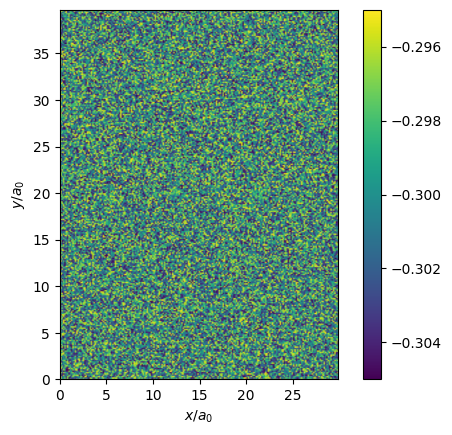

In [3]:
pfc = cf.PhaseFieldCrystal2DTriangular(30, 23)

#Set a random initial condition
pfc.psi = 0.01*(np.random.rand(pfc.xRes,pfc.yRes) - 0.5) + pfc.psi0
pfc.psi_f = sp.fft.fftn(pfc.psi)

pfc.plot_field(pfc.psi)

In [4]:
# pfc.evolve_PFC(3000)
# pfc.plot_field(pfc.psi)

Increasing the size of the simulation will create a larger polycrystalline material.

However, in many situations we want to control the polycrystalline material. 
In this case, we want to prescribe the regions with the different lattice orientations. 
Let's see how that can be done

We start by creating a simple inclusion, which is rotated with respect to the rest of the material.
To easily see what is going on, we will use the square PFC model.

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

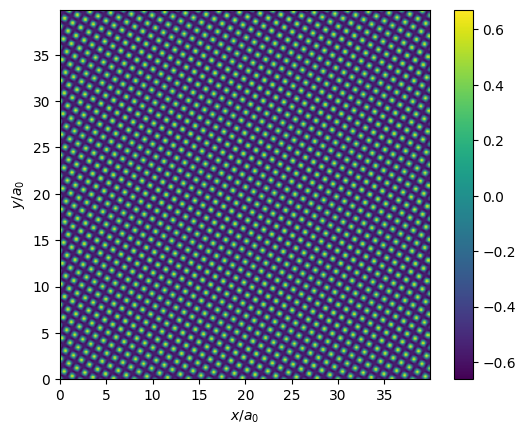

In [5]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()


psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/3)
pfc.plot_field(psi_rotated)


Now we just need to paste this region in the center onto the old field contained in the variable `pfc.psi`.

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

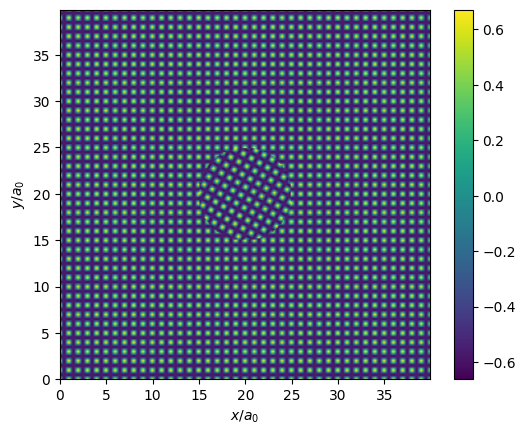

In [6]:
# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 5*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

pfc.plot_field(pfc.psi)

The interface is very sharp. In order to smooth it, we simply evolve the field for a few time steps.

NB! Remember that in order for this method to work, we need to also specify the fourier transform of the field, which is why we have added the `pfc.psi_f = sp.fft.fftn(pfc.psi)` line above. 

Evolving the PFC:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving the PFC: 100%|██████████| 100/100 [00:02<00:00, 43.51it/s]


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x/a_0$', ylabel='$y/a_0$'>)

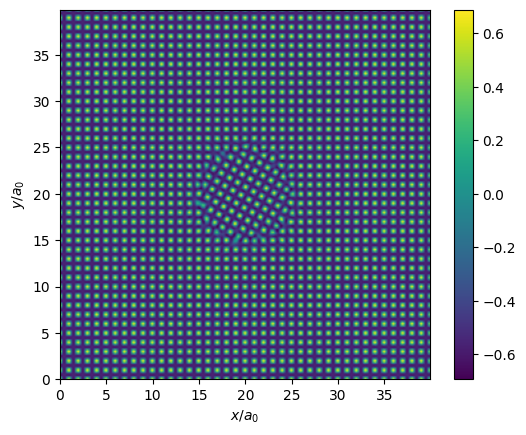

In [7]:
pfc.evolve_PFC(100)

pfc.plot_field(pfc.psi)

Let create a bigger inclusion and create an evolution gif. 

Evolving the PFC: 100%|██████████| 100/100 [00:03<00:00, 25.75it/s]


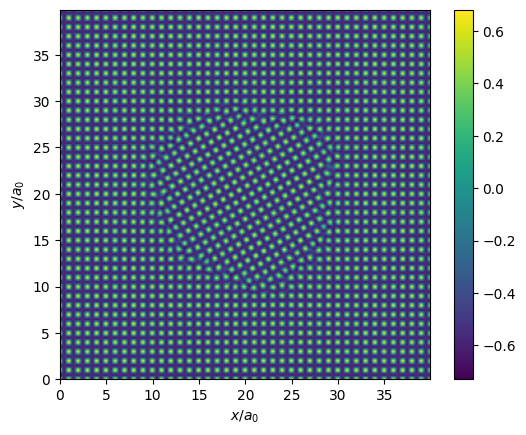

In [8]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()

# Create the rotated field
psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/6)

# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 10*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

for n in range(100):
    pfc.evolve_PFC(100)
    pfc.plot_field(pfc.psi)
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n,'Inclusion_PFC_normal')

This simulation used the normal PFC evolution equation. 
It hardly moves at all, because the inclusion is quite stuck.
Zooming in however, reveals how it is slowly moving.

If we instead employ the hydrodynamic model, we get a much quicker evolution of the interface.

I am initializing a velocity field


Evolving the hydrodynamic PFC:   0%|          | 0/100 [00:00<?, ?it/s]

Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:21<00:00,  4.70it/s]


Velocity field established.


Evolving the hydrodynamic PFC: 100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


Velocity field established.


Evolving the hydrodynamic PFC:  35%|███▌      | 35/100 [00:08<00:16,  3.99it/s]


KeyboardInterrupt: 

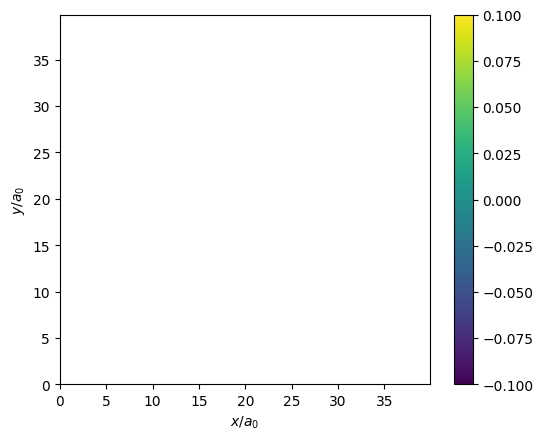

In [10]:
pfc = cf.PhaseFieldCrystal2DSquare(40, 40)

# This creates a standard orientation of the crystal
pfc.conf_PFC_from_amplitudes()

# Create the rotated field
psi_rotated = pfc.calc_PFC_from_amplitudes(rotation=np.pi/6)

# Specify the region centered at the mid position with radius 5 a0.
inclusion_region = pfc.calc_region_disk(pfc.rmid, 10*pfc.a0)

# Set the rotated field in the inclusion region
pfc.psi[inclusion_region] = psi_rotated[inclusion_region]
pfc.psi_f = sp.fft.fftn(pfc.psi)

for n in range(100):
    pfc.evolve_PFC_hydrodynamic(100)
    pfc.plot_field(pfc.psi[0])
    cf.tool_save_plot(n)
cf.tool_make_animation_gif(n,'Inclusion_PFC_normal')